In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [2]:
P_bnl = lambda n,p:p * (1 - p)**(n-1)
E_bnl = lambda p,n_max=10000:np.sum([P_bnl(n,p) * n for n in range(1,n_max)])
D_bnl = lambda p,n_max=10000:np.sum([P_bnl(n,p) * n**2 for n in range(1,n_max)]) - E_bnl(p) * E_bnl(p)

P_prd = lambda n,c,n_start=1,beta=1:float(np.prod([1 - n*c*beta for n in range(n_start,n)]) * n * c * beta)
E_prd = lambda c,n_start=1,beta=1:np.sum([P_prd(n,c,beta=beta) * n for n in range(n_start,int(1/c/beta)+2)])
D_prd = lambda c,n_start=1,beta=1:np.sum([P_prd(n,c,beta=beta) * n**2 for n in range(n_start,int(1/c/beta)+2)]) - E_prd(c) * E_prd(c)

# T_n = lambda n,p,N=90,M=73:(1-p) * (n-M)/(N-M) + p # Tn的形式根据需求来，只需要满足T(N_max)=1，Tn单调即可
T_n = lambda n,p,N=90,M=73,beta=1,alpha=0:min((beta*p+alpha) * (n-M)/(N-M),1)
P_prd_2 = lambda n,p,N=90,M=73,beta=1,alpha=0:float(np.prod([1 - T_n(n,p,N,M,beta,alpha) for n in range(M+1,n)]) * T_n(n,p,N,M,beta,alpha))
E_prd_2 = lambda p,N=90,M=73,beta=1,alpha=0:np.sum([P_prd_2(n,p,N,M,beta,alpha) * n for n in range(M+1,N)])

In [3]:
# 二分法求C值
def Prd(p_bnl,alpha=0.1,Z_max=10000,E2=0): 
    p_inf = 0
    p_sup = p_bnl
    c_prd = p_bnl
    E1 = E_prd(c_prd)
    E2 = E_bnl(p_bnl) if E2==0 else E2
    while abs(E1 - E2) >= alpha and Z_max:    
        if E1 < E2:
            p_sup = c_prd
            c_prd = (p_inf + p_sup) / 2
        else:
            p_inf = c_prd
            c_prd = (p_inf + p_sup) / 2
        E1 = E_prd(c_prd)
        Z_max -= 1      
    return c_prd

In [4]:
# for M in range(50,60):
#     print(M)
#     print(E_bnl(p_bnl_gs,n_max=M) + E_prd_2(p_bnl_gs,M=M))
#     print('---------')

In [5]:
p_bnl_gs = 0.006
N_max_gs = 90
# E2 = 90
# M = 49
M = 73
beta = 19 # Tn为一阶线性函数时，beta和alpha用来调参，也可以给定期望的值用梯度下降求
alpha = 0

In [6]:
# 综合概率1.6%，期望间隔62.5次抽出1个
print(f'E_bnl:{E_bnl(p_bnl_gs,n_max=M)}')
print(f'E_prd:{E_prd_2(p_bnl_gs,N=N_max_gs,M=M,beta=beta,alpha=alpha)}')
print(f'E:{E_bnl(p_bnl_gs,n_max=M) + E_prd_2(p_bnl_gs,M=M,beta=beta,alpha=alpha)}')

E_bnl:11.923512765518767
E_prd:50.8327735119059
E:62.756286277424664


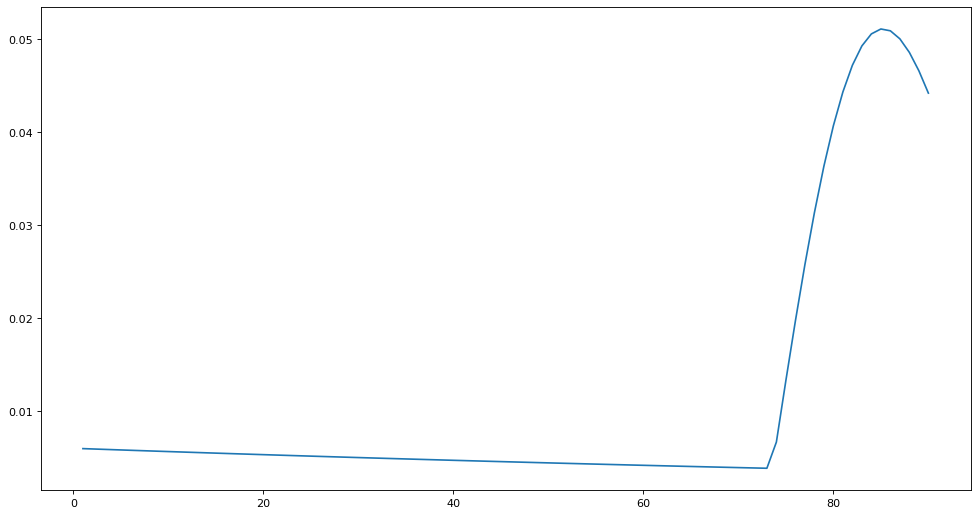

In [7]:
# 带保底的概率分布函数图像
P_t = lambda n,p,N,M,beta,alpha:P_bnl(n,p) if n<=M else P_prd_2(n,p,N,M,beta,alpha)
X_plot = [i for i in range(1,N_max_gs+1)]

fig = plt.figure(num=1, figsize=(15, 8),dpi=80)
# plt.plot(X_plot,[P_bnl(n,p1) for n in X_plot]) # blue
plt.plot(X_plot,[P_t(n,p_bnl_gs,N=N_max_gs,M=M,beta=beta,alpha=alpha) for n in X_plot]) # orange
plt.show()

B站@一颗平衡树统计的数据

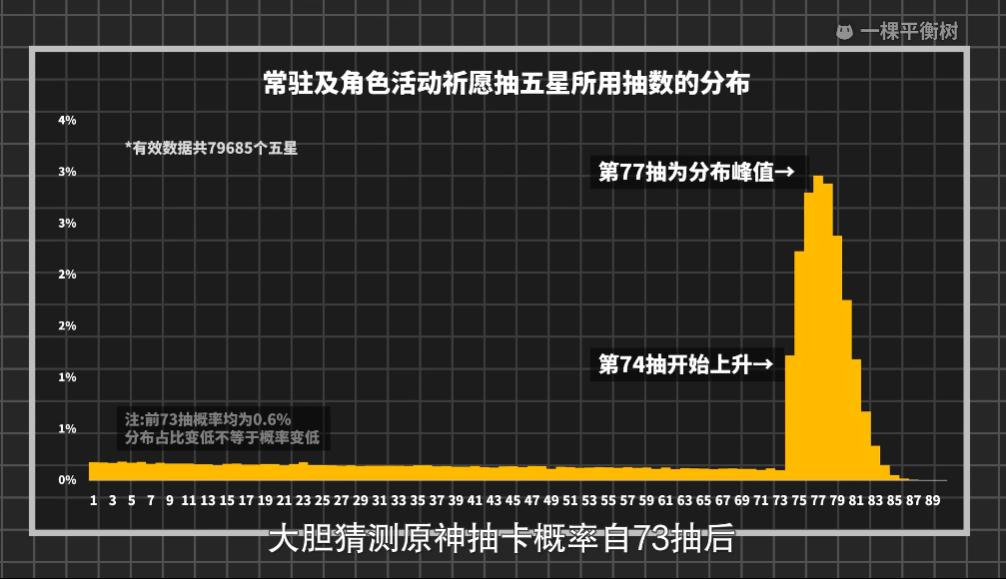